#Michigan EcoData Python Pandas Workshop Fall 2020

What is pandas? According to pandas.pydata.org, the Python library pandas is "a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language." 

* Documentation: https://pandas.pydata.org/docs/user_guide/index.html#user-guide
* Further Reading (free for umich students): https://learning.oreilly.com/library/view/python-for-data/9781491957653/ch05.html#pandas


We will be looking at the data "2016 Global Ecological Footprint" from Kaggle: https://www.kaggle.com/footprintnetwork/ecological-footprint. Take a minute to read the description, then [download](https://www.kaggle.com/footprintnetwork/ecological-footprint/download) it. You can also read more about the data from the source, [https://www.footprintnetwork.org/](http://data.footprintnetwork.org/?_ga=2.78863572.15933339.1602432983-1554082438.1602432983#/abouttheData) .

In [ ]:
import pandas as pd

In [ ]:
#If you are using Google Colab, run the following:
from google.colab import files
uploaded = files.upload()
import io
countries = pd.read_csv(io.BytesIO(uploaded['countries.csv']))

#If you are using Jupyter Notebook, uncomment and run the following (make sure data is in the same directory/folder as the notebook)
#countries = pd.read_csv("countries.csv")

Saving countries.csv to countries.csv


### Viewing the Data


In [ ]:
countries.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


#### There is also a function to view the last rows of the data frame, `.tail()`. Try applying this to the data frame `countries` like above. Can you try returning only the last three rows? (Hint: try adding an integer inside the parenthesis)

In [ ]:
#Your code here

### Getting a Sense of the Data

In [ ]:
countries.describe()

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
count,188.000000,172.00000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,188.000000,188.000000,188.000000
mean,37.342372,0.68636,0.578208,0.263179,0.373815,1.804913,0.122486,3.317606,0.531850,0.456590,2.459191,0.595145,0.067110,4.019681,0.702074,1.915745,4.037397
std,140.756836,0.15604,0.355691,0.352067,0.359349,1.898283,0.158427,2.370931,0.672567,1.014738,10.593956,1.661872,0.054844,11.689075,11.771339,1.369624,12.444616
min,0.000000,0.34000,0.070000,0.000000,0.010000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,-14.140000,0.240000,0.020000
25%,2.037500,0.55750,0.350000,0.080000,0.170000,0.420000,0.020000,1.482500,0.180000,0.030000,0.060000,0.030000,0.030000,0.675000,-1.935000,0.855000,0.942500
50%,7.970000,0.72000,0.520000,0.180000,0.260000,1.140000,0.070000,2.740000,0.350000,0.120000,0.340000,0.110000,0.050000,1.310000,-0.730000,1.580000,1.705000
75%,24.870000,0.80250,0.700000,0.320000,0.460000,2.600000,0.150000,4.640000,0.590000,0.340000,1.170000,0.370000,0.090000,2.815000,0.212500,2.677500,2.847500
max,1408.040000,0.94000,2.680000,3.470000,3.030000,12.650000,0.820000,15.820000,5.420000,8.230000,95.160000,16.070000,0.270000,111.350000,109.010000,9.140000,159.470000


In [ ]:
countries.dtypes

Country                            object
Region                             object
Population (millions)             float64
HDI                               float64
GDP per Capita                     object
Cropland Footprint                float64
Grazing Footprint                 float64
Forest Footprint                  float64
Carbon Footprint                  float64
Fish Footprint                    float64
Total Ecological Footprint        float64
Cropland                          float64
Grazing Land                      float64
Forest Land                       float64
Fishing Water                     float64
Urban Land                        float64
Total Biocapacity                 float64
Biocapacity Deficit or Reserve    float64
Earths Required                   float64
Countries Required                float64
Data Quality                       object
dtype: object

### Missing Values

In [ ]:
countries.dropna()


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,0.93,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
5,Argentina,Latin America,41.09,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,3.14,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,"Venezuela, Bolivarian Republic of",Latin America,29.96,0.763846,"$10,237.80",0.45,0.74,0.12,2.13,0.09,3.57,0.14,0.57,1.79,0.24,0.04,2.78,-0.79,2.06,1.28,5
183,Viet Nam,Asia-Pacific,90.80,0.660000,"$1,532.31",0.50,0.01,0.19,0.79,0.05,1.65,0.55,0.01,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
185,Yemen,Middle East/Central Asia,23.85,0.500000,"$1,302.30",0.34,0.14,0.04,0.42,0.04,1.03,0.09,0.12,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5
186,Zambia,Africa,14.08,0.580000,"$1,740.64",0.19,0.18,0.33,0.24,0.01,0.99,0.24,0.94,0.99,0.02,0.04,2.23,1.24,0.57,0.44,6


### Let's try try returning the countries in the data frame in two ways: first using iteration, and then using a more pandas approach. What are some of the differences between these two methods?

In [ ]:
for country in countries['Country']:
    print(country)

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Congo, Democratic Republic of
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guadeloupe
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iran, Islamic Republic of
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, Democratic People's Republic of
Korea, Republic of
Kuwait
Kyrgyzstan
Lao People's Democratic Re

In [ ]:
#selecting the column of the data frame
countries['Country']

0                    Afghanistan
1                        Albania
2                        Algeria
3                         Angola
4            Antigua and Barbuda
                 ...            
183                     Viet Nam
184    Wallis and Futuna Islands
185                        Yemen
186                       Zambia
187                     Zimbabwe
Name: Country, Length: 188, dtype: object

### We've seen how to select a column, now let's select a row.

In [ ]:
#select row by value name
afghanistan = countries['Country'] == 'Afghanistan'
countries.loc[afghanistan]

#alternativly:
#countries.loc[countries['Country'] == 'Afghanistan']

#Here is another way to select Afganistan using iloc. Afganistan is the first row, so we can call the first row's index, which is 0.
#countries.iloc[0]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.3,0.2,0.08,0.18,0.0,0.79,0.24,0.2,0.02,0.0,0.04,0.5,-0.3,0.46,1.6,6


#### "An ecological deficit occurs when the Footprint of a population exceeds the biocapacity of the area available to that population." Try selecting the rows for countries where the `Total Ecological Footprint` is greater than `Total Biocapacity`. Then select all the rows where the `Biocapacity Deficit or Reserve` is less than 0. Do you get the same results?

In [ ]:
#Select the rows for countries where the Total Ecological Footprint is greater than Total Biocapacity
footprint_greater = countries['Total Ecological Footprint']  > countries['Total Biocapacity']
countries[footprint_greater]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
4,Antigua and Barbuda,Latin America,0.09,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
6,Armenia,Middle East/Central Asia,2.97,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,2.23,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.52,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,"Venezuela, Bolivarian Republic of",Latin America,29.96,0.763846,"$10,237.80",0.45,0.74,0.12,2.13,0.09,3.57,0.14,0.57,1.79,0.24,0.04,2.78,-0.79,2.06,1.28,5
183,Viet Nam,Asia-Pacific,90.80,0.660000,"$1,532.31",0.50,0.01,0.19,0.79,0.05,1.65,0.55,0.01,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
184,Wallis and Futuna Islands,Asia-Pacific,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,1.51,-0.56,1.19,1.37,3T
185,Yemen,Middle East/Central Asia,23.85,0.500000,"$1,302.30",0.34,0.14,0.04,0.42,0.04,1.03,0.09,0.12,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5


In [ ]:
#Select all the rows where the Biocapacity Deficit or Reserve is less than 0
reserve = countries['Biocapacity Deficit or Reserve'] < 0
countries[reserve]

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,2.21,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,2.12,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
4,Antigua and Barbuda,Latin America,0.09,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,5.38,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
6,Armenia,Middle East/Central Asia,2.97,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,2.23,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.52,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,"Venezuela, Bolivarian Republic of",Latin America,29.96,0.763846,"$10,237.80",0.45,0.74,0.12,2.13,0.09,3.57,0.14,0.57,1.79,0.24,0.04,2.78,-0.79,2.06,1.28,5
183,Viet Nam,Asia-Pacific,90.80,0.660000,"$1,532.31",0.50,0.01,0.19,0.79,0.05,1.65,0.55,0.01,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
184,Wallis and Futuna Islands,Asia-Pacific,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,NaN,1.51,-0.56,1.19,1.37,3T
185,Yemen,Middle East/Central Asia,23.85,0.500000,"$1,302.30",0.34,0.14,0.04,0.42,0.04,1.03,0.09,0.12,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5


### Grouping, Aggregate Functions, and Sorting

In [ ]:
# We are sorting by Region (region will be the new index) and aggregating the values of the other columns by taking the mean.
means = countries.groupby(by='Region').mean()

# Now we are sorting rows (Regions) by the values of the column Carbon Footprint, greatest to least.
means.sort_values('HDI', ascending=False)

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
Region,,,,,,,,,,,,,,,,,
North America,117.466667,0.910000,1.295000,0.315000,0.935000,5.450000,0.120000,7.386667,2.300000,0.285000,5.345000,1.870000,0.080000,6.633333,-0.756667,4.266667,15.583333
European Union,19.383846,0.864615,0.982917,0.260417,0.641667,3.264167,0.115833,5.475385,1.081667,0.121667,1.223333,0.391250,0.135417,3.648846,-1.826923,3.162692,2.801538
Northern/Eastern Europe,19.848333,0.788333,0.708182,0.160000,0.460909,2.210909,0.060000,3.763333,0.687273,0.177273,1.303636,0.185455,0.050000,2.882500,-0.880833,2.174167,1.785833
Middle East/Central Asia,17.634174,0.726957,0.598696,0.211739,0.160870,2.948696,0.064348,4.054348,0.300870,0.283478,0.099130,0.221304,0.068696,0.974348,-3.081304,2.340870,6.036553
Latin America,15.523333,0.720433,0.450000,0.380909,0.360909,1.709394,0.132424,3.483846,0.462424,0.581212,8.550909,1.406667,0.054545,9.563590,6.080513,2.011282,3.725385
Asia-Pacific,117.580909,0.687500,0.598667,0.265667,0.374000,1.514000,0.232333,2.970303,0.550333,0.602333,1.182667,0.603000,0.076333,2.826970,-0.143030,1.715152,7.076364
Africa,19.896923,0.515714,0.389600,0.229600,0.310000,0.580800,0.093800,1.670962,0.304000,0.595600,1.022200,0.363800,0.039600,2.262692,0.591923,0.964615,1.930000


#### Your turn! Create a new data frame like above but instead of aggregating by mean, aggregate by `.sum()`. Also, sort the values by population instead of carbon footprint.

In [ ]:
sums = countries.groupby(by='Region').sum()
sums.sort_values('Population (millions)', ascending=False)

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
Region,,,,,,,,,,,,,,,,,
Asia-Pacific,3880.170,19.250000,17.96,7.97,11.22,45.42,6.97,98.02,16.51,18.07,35.48,18.09,2.29,93.29,-4.72,56.60,233.520000
Africa,1034.640,25.270000,19.48,11.48,15.50,29.04,4.69,86.89,15.20,29.78,51.11,18.19,1.98,117.66,30.78,50.16,100.360000
Latin America,605.410,23.053846,14.85,12.57,11.91,56.41,4.37,135.87,15.26,19.18,282.18,46.42,1.80,372.98,237.14,78.44,145.290000
European Union,503.980,22.480000,23.59,6.25,15.40,78.34,2.78,142.36,25.96,2.92,29.36,9.39,3.25,94.87,-47.50,82.23,72.840000
Middle East/Central Asia,405.586,16.720000,13.77,4.87,3.70,67.82,1.48,93.25,6.92,6.52,2.28,5.09,1.58,22.41,-70.87,53.84,138.840714
North America,352.400,1.820000,2.59,0.63,1.87,10.90,0.24,22.16,4.60,0.57,10.69,3.74,0.16,19.90,-2.27,12.80,46.750000
Northern/Eastern Europe,238.180,9.460000,7.79,1.76,5.07,24.32,0.66,45.16,7.56,1.95,14.34,2.04,0.55,34.59,-10.57,26.09,21.430000


#### Sometimes we want to select just the columns that we are interested in. Can you tell what the code below is doing?

In [ ]:
countries[['Country','Total Ecological Footprint']].sort_values('Total Ecological Footprint',ascending=False)[0:5]

,Country,Total Ecological Footprint
102,Luxembourg,15.82
7,Aruba,11.88
138,Qatar,10.80
8,Australia,9.31
179,United States of America,8.22


### Visualizing the Data


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Histogram

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([90., 37., 23., 14.,  4.,  3.,  0.,  1.,  0.,  1.]),
 array([ 0.   ,  1.265,  2.53 ,  3.795,  5.06 ,  6.325,  7.59 ,  8.855,
        10.12 , 11.385, 12.65 ]),
 <a list of 10 Patch objects>)

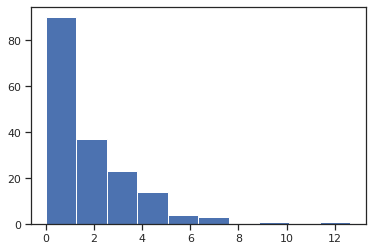

In [ ]:
#Creating a histogram using the matplotlib library
plt.hist(countries['Carbon Footprint'])

In [ ]:
#Your turn! Create a histogram using another variable.

#Your code here

#### Scatter Plot

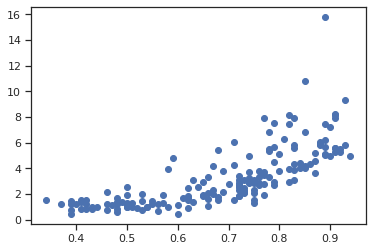

In [ ]:
plt.scatter(x=countries['HDI'], y=countries['Total Ecological Footprint'])

In [ ]:
#Your turn! Create a scatter plot using two other variables.

#Your code here

#### Pairplot

In [ ]:
smaller_df = countries[['Region', 'HDI', 'Total Ecological Footprint', 'Carbon Footprint']]
smaller_df.head(1)

,Region,HDI,Total Ecological Footprint,Carbon Footprint
0,Middle East/Central Asia,0.46,0.79,0.18


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


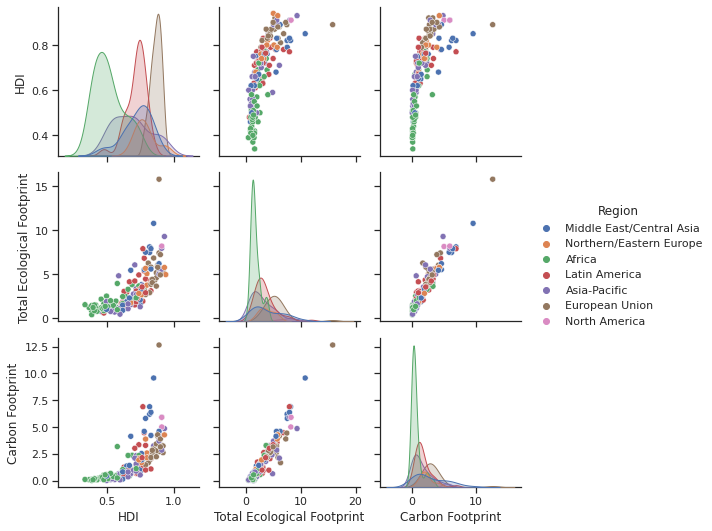

In [ ]:
#Creating a graph using the seaborn library
sns.set_theme(style="ticks")
sns.pairplot(smaller_df, hue = 'Region')